# Import Packages
###### LOGISITIC REGRESSION USING TENSORFLOW

In [1]:
import pandas as pd
import numpy as np
import cv2
import os
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.utils import shuffle
import keras

from tqdm import tqdm 
from PIL import Image
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import warnings
import time
os.listdir('fruits-360/Training')[0:10]

Using TensorFlow backend.


['Apple Braeburn',
 'Apple Crimson Snow',
 'Apple Golden 1',
 'Apple Golden 2',
 'Apple Golden 3',
 'Apple Granny Smith',
 'Apple Pink Lady',
 'Apple Red 1',
 'Apple Red 2',
 'Apple Red 3']

# Data PreProcessing

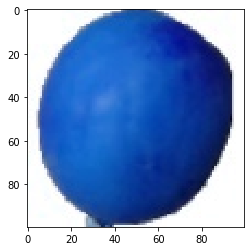

In [2]:
path = 'fruits-360/Training/Apricot/206_100.jpg'

im = cv2.imread(path)
plt.imshow(im)

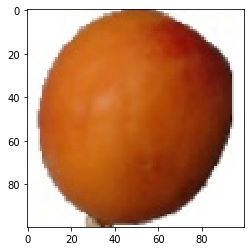

In [3]:
b,g,r = cv2.split(im)

im2 = cv2.merge([r,g,b])

plt.imshow(im2)

###### Gray Scale Image 

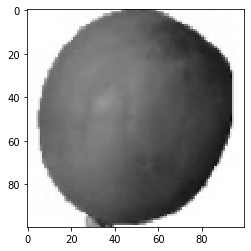

In [4]:
Apricot = cv2.cvtColor(im2,cv2.COLOR_RGB2GRAY)

plt.imshow(Apricot,cmap = 'gray')

In [5]:
Apricot

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [6]:
Apricot.shape

(100, 100)

In [7]:
Apricot = Apricot.astype('float')/255
Apricot

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [8]:
# Flatten Images
Apricot = Apricot.flatten()
Apricot = pd.Series(Apricot)
Apricot

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
9995    1.0
9996    1.0
9997    1.0
9998    1.0
9999    1.0
Length: 10000, dtype: float64

###### Read Classes & Extract Feature

In [9]:
#path = 'fruits-360/Training/'
# Intialize Parameters
singleCategory=list() 
directoryList = list()
ImageName=list()
Category=list()
Image=list()
# PRE PROCESSING 
def preProcessing_data(Path, test_file_names, train_file_names):
    i=0
    # iterating on test samples and appending Lists
    for file_name in test_file_names:
        singleCategory=Path+'Test/'+file_name+'/'
        i+=1
        for sample in os.listdir(singleCategory):
            ImageName.append(sample)
            
            Category.append(file_name)
            
            image = cv2.imread(singleCategory+sample, cv2.IMREAD_COLOR)
            ## Gray Scale RGB2BGR
            image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
            ## Appending after processing
            Image.append(np.array(image))
        print("class")
        print(i)
        

In [10]:
# EXTRACT FEATURE 
def create_train_test(features, labels):
    X =features 
    y=labels
    
    return train_test_split(X, y, test_size=.3, random_state=42)

In [11]:
Path='fruits-360/'
test_file_names = os.listdir(Path+'Test')
train_file_names= os.listdir(Path+'Training')
preProcessing_data(Path, test_file_names, train_file_names)

class
1
class
2
class
3
class
4
class
5
class
6
class
7
class
8
class
9
class
10
class
11
class
12
class
13
class
14
class
15
class
16
class
17
class
18
class
19
class
20
class
21
class
22
class
23
class
24
class
25
class
26
class
27
class
28
class
29
class
30
class
31
class
32
class
33
class
34
class
35
class
36
class
37
class
38
class
39
class
40
class
41
class
42
class
43
class
44
class
45
class
46
class
47
class
48
class
49
class
50
class
51
class
52
class
53
class
54
class
55
class
56
class
57
class
58
class
59
class
60
class
61
class
62
class
63
class
64
class
65
class
66
class
67
class
68
class
69
class
70
class
71
class
72
class
73
class
74
class
75
class
76
class
77
class
78
class
79
class
80
class
81
class
82
class
83
class
84
class
85
class
86
class
87
class
88
class
89
class
90
class
91
class
92
class
93
class
94
class
95
class
96
class
97
class
98
class
99
class
100
class
101
class
102
class
103
class
104
class
105
class
106
class
107
class
108
class
109
class
110
class
11

###### Use SKLEARN for  Split the data into Train & Test Data

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report

Image = np.array(Image)       
Category = np.array(Category) 
# create test and training sets
x_train, x_test, y_train, y_test = create_train_test(Image, Category)

In [13]:
print(x_test)

[[[[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  ...

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]]


 [[[252 255 255]
   [252 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[252 255 255]
   [254 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[252 255 255]
   [254 255 255]
   [255 254 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255

In [14]:
print(x_train)

[[[[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  ...

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]]


 [[[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255

###### Shape of Images & Labels

In [15]:
print(f'train images: {x_train.shape}')
print(f'train labels: {y_train.shape}')
print(f' test images: {x_test.shape}')
print(f' test labels: {y_test.shape}')

train images: (14435, 100, 100, 3)
train labels: (14435,)
 test images: (6187, 100, 100, 3)
 test labels: (6187,)


###### One Hot Encoding for Data

In [16]:
# Reshaping the data into 100 x 100 x 3 for keeping the 3d then divide the result to make array of 0,1  
x_train = x_train.reshape(x_train.shape[0], 100*100*3) / 255


In [17]:
x_test = x_test.reshape(x_test.shape[0], 100*100*3) / 255

In [18]:
x_train[:4] 

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [19]:
label_to_idDictionary = {j:i for i,j in enumerate(np.unique(y_train))}
id_to_labelDictionary = {j: k for k, j in label_to_idDictionary.items()}

In [20]:
y_train = np.array([label_to_idDictionary[i] for i in y_train])
y_test = np.array([label_to_idDictionary[i] for i in y_test])
y_train = keras.utils.to_categorical(y_train, len(label_to_idDictionary))
y_test = keras.utils.to_categorical(y_test, len(label_to_idDictionary))

In [21]:
y_train[:4] 

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.,

In [22]:
y_train[:4]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.,

# Build the Model

###### Hyper Parameters

In [23]:
# hyper parameters
learning_rate = 0.01
epochs = 40
batch_size = 100   #tens of thousands of inputs would be computationally hard
batches = int(x_train.shape[0] / batch_size) #the number of batches(small sets of the training set)
# x_train.shape[0] = 60000 so the number of baches = 600 batch 

###### Define X,Y,W,B for Tensorflow 

###### Y =  σ( X.W + B )

In [24]:
tf.compat.v1.disable_eager_execution()
X = tf.compat.v1.placeholder(tf.float32, [None, 100*100*3])
Y = tf.compat.v1.placeholder(tf.float32,  [None, 120])
# weights and bias
# weights convert X to same shape as Y
# bias is the same shape as Y
W = tf.compat.v1.Variable(.1 * np.random.randn(100*100*3, 120).astype(np.float32))
B = tf.compat.v1.Variable(.1 * np.random.randn(120).astype(np.float32))
# W,B variables are the things we are going to train for (variables = learned values)
# X,Y placeholders are input data ( images and labels)


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [25]:
pred = tf.nn.softmax(tf.add(tf.matmul(X,W), B))
# Equation 
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.compat.v1.log(pred), axis=1))
optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [26]:
# Here is the learning, don't forget type compat.v if you use tensorflow version 1 and remove it if version 2
with tf.compat.v1.Session() as sesh:
    sesh.run(tf.compat.v1.global_variables_initializer())
    
    for epoch in range(epochs):
        for i in range(batches):
            offset = i * epoch
            x = x_train[offset: offset + batch_size]
            y = y_train[offset: offset + batch_size]
            
            sesh.run(optimizer, feed_dict={X: x, Y:y})
            c = sesh.run(cost, feed_dict={X:x, Y:y})
        print(f'epoch:{epoch:2d} cost={c:.4f}')
    # From Section
    correct_pred = tf.equal(tf.argmax(pred, 1), tf.argmax(Y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
    accuracy_precentage = accuracy.eval({X: x_test, Y: y_test})
    print(f'Accuracy: {accuracy_precentage * 100:.2f}%')
    
    prediction_values = sesh.run(pred,feed_dict={X:x_test})
   

epoch: 0 cost=0.1753
epoch: 1 cost=2.0831
epoch: 2 cost=1.9978
epoch: 3 cost=1.4220
epoch: 4 cost=1.3253
epoch: 5 cost=1.0380
epoch: 6 cost=0.8532
epoch: 7 cost=0.8737
epoch: 8 cost=0.3814
epoch: 9 cost=0.6089
epoch:10 cost=0.5664
epoch:11 cost=0.6411
epoch:12 cost=0.2878
epoch:13 cost=0.4039
epoch:14 cost=0.5062
epoch:15 cost=0.2822
epoch:16 cost=0.2782
epoch:17 cost=0.2588
epoch:18 cost=0.2032
epoch:19 cost=0.3337
epoch:20 cost=0.3673
epoch:21 cost=0.2753
epoch:22 cost=0.2994
epoch:23 cost=0.0754
epoch:24 cost=0.3927
epoch:25 cost=0.1412
epoch:26 cost=0.2187
epoch:27 cost=0.1109
epoch:28 cost=0.2549
epoch:29 cost=0.1364
epoch:30 cost=0.1534
epoch:31 cost=0.0744
epoch:32 cost=0.1558
epoch:33 cost=0.2072
epoch:34 cost=0.1555
epoch:35 cost=0.3176
epoch:36 cost=0.1209
epoch:37 cost=0.1589
epoch:38 cost=0.0823
epoch:39 cost=0.1446
Accuracy: 93.65%


###### Confusion Matrix

In [31]:
with tf.compat.v1.Session() as sesh:
  true_class=np.argmax(y_test,1)
  predicted_class=np.argmax(prediction_values,1)
  cm=tf.compat.v1.confusion_matrix(predicted_class,true_class)
  print(sesh.run(cm))



[[51  0  0 ...  0  0  0]
 [ 0 39  0 ...  0  0  0]
 [ 0  0 54 ...  0  0  0]
 ...
 [ 0  0  0 ... 29  0  0]
 [ 0  0  0 ...  0 58  0]
 [ 0  0  0 ...  1  0 71]]


###### 𝐶=∑−𝑌ln(𝑝𝑟𝑒𝑑)
###### the Cost function C is equal to the sum of - Y times the national log of prediction

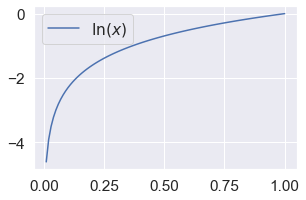

In [32]:
x = np.linspace(1/100, 1, 100)
fig, ax = plt.subplots(1, figsize=(4.7, 3))
ax.plot(x, np.log(x), label='$\ln(x)$')
ax.legend()
plt.show()

### Visualization Data 

No. of Training Samples: 60498
No. of Test Samples: 20622


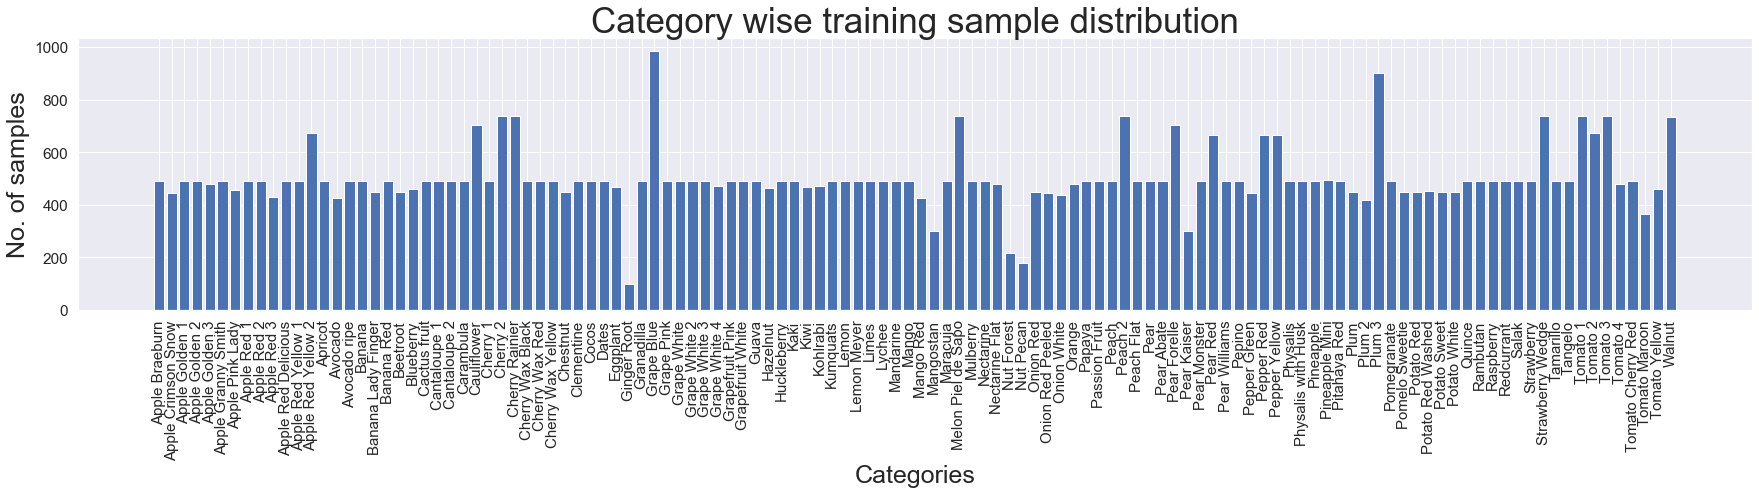

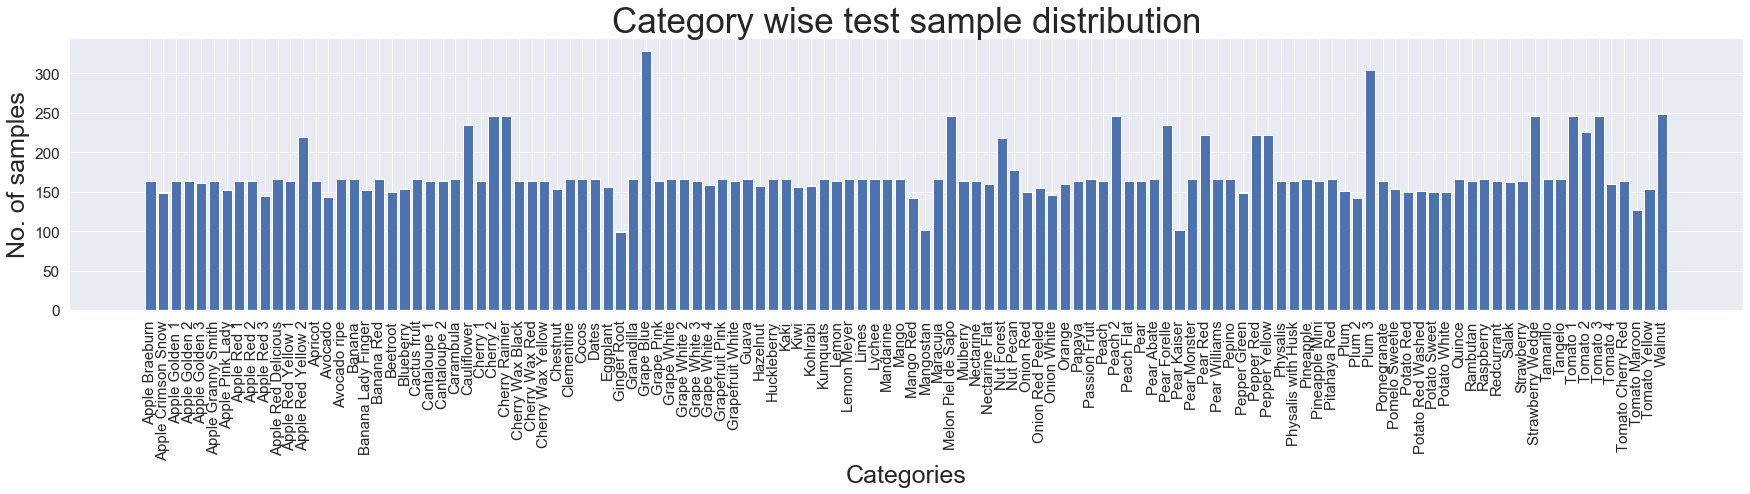

In [33]:
import os, os.path
train_categories = []
train_samples = []
for i in os.listdir("fruits-360/Training"):
    train_categories.append(i)
    train_samples.append(len(os.listdir("fruits-360/Training/"+ i)))

test_categories = []
test_samples = []
for i in os.listdir("fruits-360/Test"):
    test_categories.append(i)
    test_samples.append(len(os.listdir("fruits-360/Test/"+ i)))

    
print("No. of Training Samples:", sum(train_samples))
print("No. of Test Samples:", sum(test_samples))


fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 30
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size

index = np.arange(len(train_categories))
plt.bar(index, train_samples)
plt.xlabel('Categories', fontsize=25)
plt.ylabel('No. of samples', fontsize=25)
plt.xticks(index, train_categories, fontsize=15, rotation=90)
plt.title('Category wise training sample distribution', fontsize=35)
plt.show()


index2 = np.arange(len(test_categories))
plt.bar(index2, test_samples)
plt.xlabel('Categories', fontsize=25)
plt.ylabel('No. of samples', fontsize=25)
plt.xticks(index2, test_categories, fontsize=15, rotation=90)
plt.title('Category wise test sample distribution', fontsize=35)
plt.show()
